# Парсер вакансий 

*подготовила Смоленская Юлия*

Дашборд

https://datalens.yandex/co7o38nfdgbu3 

## Декомпозиция


**Цель исследования:** 

Составить портрет сотрудника DE, DS И DA с точки зрения образования, грейда, заработной платы , условий работы и возможностей релокации

Необходимо выделить наиболее распространённый запрос работодателя под вакансии DE, DS И DA, включая требования к образованию и вузу, грейду и возрасту, в зависимости от размера компании, ее отрасли и условий труда. 

Для этого:
- выделим сначала 3 специальности (DE, DS И DA)
- По объявлениям для каждой специальности  выделим наиболее востребованные: образование и вуз (если есть)**, навыки, грейды, з-пл, формат
- Далее рассмотрим эту информацию в разрезе размера компаний (Крупные компании, средние и стартапы)*

Основными пользователями результатов анализа являются выпускники и учащиеся по специальностям DE, DS И DA.  На основе анализа соискатели смогут иметь представление о возможных вакансиях, на которые могут претендовать, и возможном работодателе или скорректировать планы на учебы.

**Гипотезы:** 

 - Чем выше Грейд, тем выше зарплата. Проверим влияют ли на уровень зарплаты опыт и навыки. 
Средняя зарплата варьируется в зависимости от специальности. Как изменяется зарплата между разными специальностями.
 - В зависимости от размера компании меняется запрос по специальности*. Какие компании более заинтересованы в аналитиках, какие - в инженерах, а какие - в дата саинтистах. 
 - Количество вакансий в текущем году ниже, чем в предыдущем по всем специальностям. В связи с экономическими и геополитическими изменениями количество вакансий снизилось.

**План:**

1. Цель и сбор информации об источниках 
2. Декомпозиция и ревью
3. Парсинг данных
4. Предподготовка: 
 - анализ текста и выделение заданных признаков (столбцы)
 - обработка пропусков 
 - приведение к нужному типу данных
 - обработка дубликатов 
 - работа с текстом 
 - обработка  аномалий и выбросов 
5. Формирование общего датасета для каждой специальности
6. Исследование: 
- распределение по параметрам по трем специальностям 
 - навыки 
 - грейды 
 - Зарплата
 - формат
 - график
- распределение по размеру компаний*: 
 - навыки 
 - грейды 
 - Зарплата
 - формат
 - график
 - сферы
7. Проверка гипотез
- По трем специальностям подготовим: 
 - распределение по параметрам по трем специальностям: образование и вуз (если есть), грейды, з-пл, релокации и др. условия
 - распределены зарплаты в зависимости от грейда и специальности (гипотеза 1 и 2)
- По размеру компаний*:
 - Распределение специальностей (гипотеза 3) 
- Сравнить количество вакансий в текущий и предыдущий год
8. Подготовка результатов
9. Составление дашборда



\* пункты с разбивкой по размеру компаний будут реализованы при условии возможности их классификации

\** образование заменила на навыки

## Подготовка данных

In [1]:
# Импорт библиотек
import requests
import numpy as np
import os
import pandas as pd
import json
from datetime import datetime
import re
from IPython.core.display import display, HTML, clear_output
import ipywidgets as widgets
from sklearn.feature_extraction.text import CountVectorizer
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/205898754.py:9: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output
/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/205898754.py:9: DeprecationWarning: Importing clear_output from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML, clear_output


In [2]:
### Загрузим файл
telegram = pd.read_csv('telegram.csv')

In [3]:
# просмотрим информацию 
telegram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6035 entries, 0 to 6034
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   chat        5036 non-null   object
 1   message_id  6035 non-null   int64 
 2   date        6035 non-null   object
 3   text        5482 non-null   object
 4   entities    5384 non-null   object
dtypes: int64(1), object(4)
memory usage: 235.9+ KB


In [4]:
#сбросим индекс
telegram = telegram.dropna().reset_index(drop=True) 

In [5]:
# проверим индексы
telegram.head()

,chat,message_id,date,text,entities
0,"{\n ""_"": ""Chat"",\n ""id"": -1001269328727,...",305,2022-09-21 11:17:48,#системный аналитик #вакансия \n\nФормат: удал...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
1,"{\n ""_"": ""Chat"",\n ""id"": -1001269328727,...",304,2022-09-21 08:49:51,#Вакансия \nИщу аналитика (бизнес/системный) в...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
2,"{\n ""_"": ""Chat"",\n ""id"": -1001269328727,...",303,2022-09-14 22:47:26,#Вакансия #Junior #Middle #Senior #Python3 #уд...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
3,"{\n ""_"": ""Chat"",\n ""id"": -1001269328727,...",302,2022-09-05 15:03:49,#vacancy #вакансия #BI #Engineer #Tableau #Sen...,"[\n {\n ""_"": ""MessageEntity"",\n ..."
4,"{\n ""_"": ""Chat"",\n ""id"": -1001269328727,...",299,2022-08-22 16:26:21,#работа #вакансия #data_manаger #data_analyst ...,"[\n {\n ""_"": ""MessageEntity"",\n ..."


In [6]:
# Посмотрим пример вакансии
print(telegram.iloc[5]['text'])

#вакансия #удаленка #аналитик #системныйаналитик #middle 

Системный аналитик (middle) 
Компания: ФГУП «ЗащитаИнфо Транс» 
Вилка по зп: 150-250 net 
 
Обязанности: 

• Участвовать в проектах по созданию крупных государственных информационных систем в транспортной отрасли. 
• Формировать и управлять требованиями к информационным системам. 
• Формировать технические спецификации для команд разработки и контролировать их реализацию. 
• Участвовать в проектировании ПО. 
• Проектировать реализацию интеграционного взаимодействия систем и сервисов. 
• Участвовать в формирование бэклога разработки. 
• Формировать модели данных и описывать структуру БД. 
• Участвовать в разработке документации (ТЗ, функциональных требований, технических условий, регламентов информационного взаимодействия, ПМИ, эксплуатационной документации). 

Требования: 

• Высшее техническое образование (законченное). 
• Опыт работы в области системного анализа от 2 лет.
• Понимание жизненного цикла разработки программного о

In [7]:
# Преобразуем дату
telegram['date'] = pd.to_datetime(telegram['date'])

In [8]:
# посмотрим диапазон дат
telegram['date'].describe()

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/3219322398.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  telegram['date'].describe()


count                    4500
unique                   4464
top       2021-11-16 11:42:43
freq                        5
first     2019-03-14 20:57:38
last      2022-09-28 11:05:09
Name: date, dtype: object

#### Комментарий

загружено 4500 строк в диапазоне дат с 2019-03-14 по 2022-09-28

In [9]:
# Достанем из столбца чат в фомате json IDшник и название чата
telegram["chat_id"] = telegram["chat"].apply(lambda x: json.loads(x)['id'])
telegram["chat_title"] = telegram["chat"].apply(lambda x: json.loads(x)['title'])

In [10]:
# оставим в описании только буквы, цифры и нужные символы
telegram['text_clear'] = telegram['text'].apply(lambda x: re.sub(r'[^а-яёА-ЯЁa-zA-z0-9/$₽]', ' ', x.lower()))

In [11]:
# проверим повторы
telegram['text_clear'].duplicated().sum()

548

In [12]:
# удалим дубликаты
telegram['text_clear'].drop_duplicates().reset_index(drop= True)

0        системный аналитик  вакансия   формат  удалён...
1        вакансия  ищу аналитика  бизнес/системный  в ...
2        вакансия  junior  middle  senior  python3  уд...
3        vacancy  вакансия  bi  engineer  tableau  sen...
4        работа  вакансия  data_manаger  data_analyst ...
                              ...                        
3947    senior nlp engineer с амбициями стать сто  wat...
3948     работа   удаленка  офис  вакансия  ml  datasc...
3949     вакансия  dataanalyst  datascience  москва  f...
3950      руководитель направления ds    150 270₽   вн...
3951      владелец продукта    150 350₽   внушительные...
Name: text_clear, Length: 3952, dtype: object

## Создание новых признаков (столбцов)

### Специальность

In [13]:
ds = r'scien|саен|\bds\b'
da = r'analyst|analysis|аналитик|aналитик|\bda\b'
de = r'engineer|инженер|\bde\b'
dev = r'разработч|developer'

In [14]:
# напишем ф-ию для категоризации
def spec(row):
    if re.search(ds, row['text_clear']):
        return 'ds'
    elif re.search(da, row['text_clear']):
        return 'da'
    elif re.search(de, row['text_clear']):
        return 'de'
    elif re.search(dev, row['text_clear']):
        return 'dev'
    else:
        return 'n/d'

In [15]:
# применим функцию
telegram['spec'] = telegram.apply(spec, axis = 1)

In [16]:
# проверим распределение специальностей
telegram['spec'].value_counts()

da     1883
ds     1224
de      640
n/d     401
dev     352
Name: spec, dtype: int64

In [17]:
telegram['spec'][telegram['spec'] == 'n/d']

69      n/d
123     n/d
199     n/d
205     n/d
222     n/d
       ... 
4464    n/d
4470    n/d
4472    n/d
4480    n/d
4491    n/d
Name: spec, Length: 401, dtype: object

In [18]:
print(telegram['text_clear'][4472])

контакт   adbul_3


In [19]:
telegram['len'] = telegram['text_clear'].apply(lambda x: len(x.split()))

In [20]:
telegram['len'][telegram['len'] < 20]

69      19
265      5
283      3
321      3
369     19
        ..
3537    16
4135     3
4303    11
4464     2
4472     2
Name: len, Length: 306, dtype: int64

In [21]:
index = telegram['len'][telegram['len'] < 20].index
index

Int64Index([  69,  265,  283,  321,  369,  423,  444,  459,  485,  495,
            ...
            2998, 2999, 3009, 3474, 3488, 3537, 4135, 4303, 4464, 4472],
           dtype='int64', length=306)

In [22]:
telegram = telegram.drop(index = index, axis = 0)

In [23]:
index2 = telegram[telegram['spec'] == 'dev'].index
index3 = telegram[telegram['spec'] == 'n/d'].index

In [24]:
telegram = telegram.drop(index = index2, axis = 0)
telegram = telegram.drop(index = index3, axis = 0)

In [25]:
telegram = telegram.reset_index(drop = True)
telegram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   chat        3512 non-null   object        
 1   message_id  3512 non-null   int64         
 2   date        3512 non-null   datetime64[ns]
 3   text        3512 non-null   object        
 4   entities    3512 non-null   object        
 5   chat_id     3512 non-null   int64         
 6   chat_title  3512 non-null   object        
 7   text_clear  3512 non-null   object        
 8   spec        3512 non-null   object        
 9   len         3512 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(6)
memory usage: 274.5+ KB


In [26]:
# проверим распределение специальностей
telegram['spec'].value_counts()

da    1771
ds    1122
de     619
Name: spec, dtype: int64

#### Комментарий

После разделения вакансий по специальностям выделено DS - 1122, DA - 1771, DE - 619. При этом есть вакансии разработчиков 349, а также не определены 333.

### Степень

In [27]:
grade = r'junior|senior|middle|сеньор|джун|мидл'

In [28]:
telegram['grade_list'] = telegram['text_clear'].apply(lambda x: re.search(grade ,x))
telegram['grade'] = telegram['grade_list'].apply(lambda x: x.group(0) if x != None else 'None')

In [29]:
telegram['grade'].value_counts()

None      2344
senior     457
middle     418
junior     259
джун        21
мидл        10
сеньор       3
Name: grade, dtype: int64

In [30]:
telegram['grade'][telegram['grade'] == 'джун'] = 'junior'
telegram['grade'][telegram['grade'] == 'мидл'] = 'middle'
telegram['grade'][telegram['grade'] == 'сеньор'] = 'senior'

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/3545731645.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['grade'][telegram['grade'] == 'джун'] = 'junior'
/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/3545731645.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['grade'][telegram['grade'] == 'мидл'] = 'middle'
/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/3545731645.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

#### Комментарий

Степень выделена для 1339 вакансий, оценим тогда требуемый опыт.

### Опыт

In [31]:
exp = r'\b\d(?:\s*|х)\s*(?:лет|years)|от (?:года|двух|трех|четырех|пяти)|от\s*\b\dх'

In [32]:
telegram['exp'] = telegram['text_clear'].apply(lambda x: " ".join(re.findall(exp ,x)))

In [33]:
telegram['exp']

0             от 2х
1             3 лет
2        от четырех
3             от 3х
4             2 лет
           ...     
3507               
3508          5 лет
3509        от года
3510    2 лет 5 лет
3511          3 лет
Name: exp, Length: 3512, dtype: object

In [34]:
telegram['exp'][(telegram['exp'] != '') & (telegram['grade']== 'None')]

0             от 2х
1             3 лет
3             от 3х
5             2 лет
28            3 лет
           ...     
3505        3 years
3508          5 лет
3509        от года
3510    2 лет 5 лет
3511          3 лет
Name: exp, Length: 391, dtype: object

In [35]:
jun = r'1|2|года'
mid = r'3|4|двух|трех|четырех|5|пяти'
sen = r'6|7|8|9'

In [36]:
telegram['exp_grade'] = telegram['exp'].apply(lambda x: 'junior' if re.search(jun, x) else x)
telegram['exp_grade'] = telegram['exp_grade'].apply(lambda x: 'middle' if re.search(mid, x) else x)
telegram['exp_grade'] = telegram['exp_grade'].apply(lambda x: 'senior' if re.search(sen, x) else x)

In [37]:
telegram['grade'][(telegram['exp'] != '') & (telegram['grade']== 'None')] = telegram['exp_grade']

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/667645189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['grade'][(telegram['exp'] != '') & (telegram['grade']== 'None')] = telegram['exp_grade']


In [38]:
telegram['grade'].value_counts()

None      1953
middle     616
senior     479
junior     464
Name: grade, dtype: int64

#### Комментарий

Получен опыт для 695 вакансий, из них 457 возможно использовать для заполнения грейда

### Формат

In [165]:
format=r'удаленно|удалённо|удаленный|удаленка|удалёнка|гибрид|дистанц|remote work|remote|офис|офисе'

In [166]:
telegram['format'] = telegram['text_clear'].apply(lambda x: " ".join(re.findall(format ,x)))

In [167]:
telegram['format'].head(10)

0    удалённо гибрид удаленка гибрид офис
1                                удаленно
2                удаленно remote удаленно
3                               офис офис
4               удаленка гибрид офис офис
5                                  remote
6                             remote work
7    remote удаленка remote удаленно офис
8          удаленно удаленный офис гибрид
9                                        
Name: format, dtype: object

In [168]:
telegram['format'][telegram['format'] == ''] = 'офис'

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/1889295229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['format'][telegram['format'] == ''] = 'офис'


In [169]:
remote = r'удал|remote|дистанц'
telegram['remote'] = telegram['format'].apply(lambda x: True if re.search(remote, x) else False)

In [170]:
office = r'офис'
telegram['office'] = telegram['format'].apply(lambda x: True if re.search(office, x) else False)

In [171]:
hybrid = r'hybrid|гибрид'
telegram['hybrid'] = telegram['format'].apply(lambda x: True if re.search(hybrid, x) else False)

In [172]:
def format(row):
    if row['remote'] == True:
        return 'remote'
    elif row['office'] == True:
        return 'office'
    elif row['hybrid'] == True:
        return 'hybrid'

In [174]:
telegram['format_work'] = telegram.apply(format, axis = 1)

In [176]:
telegram['format_work'].isna().sum()

0

#### Комментарий

в полученных данных не хватает 1589 позиций, возможно предположить, что подраземевается стандартный формат работы в офисе

### График

In [46]:
day = r'занятость\s*полная|возможность выбрать время начала|гибкий график|работа в офисе|полный день|полный рабочий день|не полный день|не полный рабочий день|5/2|part-time|part time|full time|full-time'

In [47]:
telegram['day'] = telegram['text_clear'].apply(lambda x: " ".join(re.findall(day ,x)))

In [48]:
telegram['day'].head(10)

0                       занятость  полная
1                           гибкий график
2               полный день гибкий график
3                      работа в офисе 5/2
4    5/2 возможность выбрать время начала
5                                        
6                           part time 5/2
7                                        
8         занятость  полная гибкий график
9                                        
Name: day, dtype: object

In [49]:
telegram['day'][telegram['day'] == ''].count()

2497

In [50]:
telegram['day'][telegram['day'] == ''] = 'полный день 5/2 '

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/3299683051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['day'][telegram['day'] == ''] = 'полный день 5/2 '


In [51]:
full = r'full|полн'
part = r'part|част'


In [52]:
def day_sort(row):
    if re.search(full, row['day']):
        return 'full'
    elif re.search(part, row['day']):
        return 'part'
    else:
        return 'n/d'

In [53]:
telegram['schedule'] = telegram.apply(day_sort, axis = 1)

In [54]:
telegram['schedule'].value_counts()

full    3057
n/d      418
part      37
Name: schedule, dtype: int64

#### Комментарий

в полученных данных не хватает 3024 позиций, возможно предположить, что подраземевается стандартный график работы: полный день 5/2

### Топовые компании

In [55]:
### Загрузим файл со списком топ 100 компаний
companies = pd.read_csv('companies.csv', sep=';')

In [56]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 3 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Место по итогам 2020 года   600 non-null    int64 
 1   Группа компаний / компания  600 non-null    object
 2   Отрасль                     600 non-null    object
dtypes: int64(1), object(2)
memory usage: 14.2+ KB


In [57]:
companies=companies.rename(columns={'Место по итогам 2020 года':'num', 
                                    'Группа компаний / компания':'name',
                                   'Отрасль':'sector'})

In [58]:
companies['sector'].value_counts()

оптовая торговля                                                     143
розничная торговля                                                    70
машиностроение                                                        35
транспорт и логистика                                                 34
банки                                                                 28
нефтяная и нефтегазовая промышленность                                27
пищевая промышленность                                                27
химическая и нефтехимическая промышленность                           24
инжиниринг, промышленно-инфраструктурное строительство                20
цветная металлургия                                                   17
черная металлургия                                                    16
электроэнергетика                                                     16
строительство                                                         15
энергосбытовая деятельность                        

In [59]:
companies['name_clear'] = companies['name'].apply(lambda x: re.sub(r'[^а-яёА-ЯЁa-zA-z0-9]', ' ', x.lower()))
companies['name_clear'] = companies['name_clear'].apply(lambda x: re.sub(r'(\s*)нефтяная компания(\s*)|(\s*)розничная сеть(\s*)|(\s*)сеть гипермаркетов(\s*)|(\s*)государственная(\s*)|(\s*)россия(\s*)|(\s*)россии(\s*)|(\s*)горно металлургическая(\s*)|группа компаний(\s*)|(\s*)группа(\s*)|(\s*)пао(\s*)|(\s*)объединенная компания(\s*)|(\s*)российские авиалинии(\s*)|(\s*)гуп(\s*)|(\s*)охк(\s*)|(\s*)компания(\s*)|(\s*)корпорация(\s*)|(\s*)авиакомпания(\s*)|(\s*)строительный торговый дом(\s*)|(\s*)фгуп(\s*)|(\s*)завод(\s*)|(\s*)торгово финансовый дом(\s*)|(\s*)магазины zarina  befree  love republic  sela(\s*)|(\s*)оптовая торговля(\s*)|(\s*)карс(\s*)|(\s*)торговая(\s*)', '', x))
companies['name_clear'] = companies['name_clear'].apply(lambda x: re.sub(r"^\s+", "", x))
companies['name_clear'] = companies['name_clear'].apply(lambda x: re.sub(r"\s+$", "", x))

In [60]:
companies['name_clear'].head(10)

0     газпром
1      лукойл
2    роснефть
3    сбербанк
4         ржд
5    x5 group
6      ростех
7      магнит
8         втб
9     росатом
Name: name_clear, dtype: object

In [61]:
list_top_100 = companies['name_clear'].head(100).tolist()

In [62]:
list_top_100[:9]

['газпром',
 'лукойл',
 'роснефть',
 'сбербанк',
 'ржд',
 'x5 group',
 'ростех',
 'магнит',
 'втб']

In [63]:
telegram['top'] = telegram['text_clear'].str.contains('|'.join(list_top_100))

In [64]:
telegram['top'].value_counts()

False    2575
True      937
Name: top, dtype: int64

#### Комментарий

Вакансий от топовых компаний 1154

### Cтартапы

In [65]:
startup = r'стартап|startup|старт ап|start up'

In [66]:
telegram['startup'] = telegram['text_clear'].apply(lambda x: True if re.search(startup, x) else False)


In [67]:
telegram['startup'].value_counts()

False    3310
True      202
Name: startup, dtype: int64

In [68]:
telegram[(telegram['startup']) & (telegram['top'])].index

Int64Index([  19,   36,   56,  188,  204,  644,  678,  700,  728,  807,  816,
             820,  821,  859,  894,  917, 1057, 1345, 1485, 2152, 2368, 2387,
            2393, 2398, 2407, 2431, 2493, 2512, 2593, 2718, 2721, 2763, 2861,
            2883, 2888, 2919, 2974, 3007, 3012, 3017, 3028, 3042, 3086, 3233,
            3308, 3315, 3316, 3350, 3393, 3456, 3464, 3470, 3506],
           dtype='int64')

In [69]:
telegram['top'][(telegram['startup']) & (telegram['top'])] = False

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/4115408267.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['top'][(telegram['startup']) & (telegram['top'])] = False


In [177]:
def comp(row):
    if row['top'] == True:
        return 'top'
    elif row['startup'] == True:
        return 'startup'
    else:
        return 'other'

In [178]:
telegram['comp'] = telegram.apply(comp, axis =1)

#### Комментарий

230 стартапа, но есть пересечение с топовыми. в некоторых случаях - это стартап от крупной компании, но много не верно интерпритируется Яндекс (в требованиях, а не нанематель). Поэтому, все пересечения можно отметить как стартапы и удалить из топов.

### Навыки

In [70]:
skills = r'grafana|mlflow|xgboost|lightgbm|seaborn|skipy|scikit learn|bigquery|postgresql|numpy|matplot|postgresql|jupyter|pandas|html|css|js|oracle|python 3|python|numpy|pytorch|tensorflow|keras|docker|git|sql|tableau|\bbi\b|tableau|airflow|etl|excel|power query|power pivot'


In [71]:
telegram['skills'] = telegram['text_clear'].apply(lambda x: " ".join(re.findall(skills ,x)))

In [72]:
telegram['skills']

0                                                     sql
1                                                  js sql
2       bi tableau bi tableau bi tableau bi tableau ta...
3                python sql excel power query power pivot
4                                                      js
                              ...                        
3507                            python 3 tensorflow keras
3508                     python python tensorflow git git
3509                                           sql python
3510                                           python sql
3511                                               python
Name: skills, Length: 3512, dtype: object

In [73]:
telegram['skills']= telegram['skills'].apply(lambda x: pd.Series(((",".join(x.split()))).split(',')).unique())

In [74]:
telegram['skills']= telegram['skills'].apply(lambda x: ' '.join(x))

In [75]:
telegram['skills'][6]

'excel'

In [76]:
vectorizer=CountVectorizer()

In [77]:
corpus = telegram['skills']

In [78]:
count_matrix = vectorizer.fit_transform(corpus)

In [79]:
count_array = count_matrix.toarray()

In [80]:
vectorizer.fit(corpus)

CountVectorizer()

In [81]:
vectors = vectorizer.transform(corpus)

In [82]:
matrix_count = vectors.todense()
matrix_count

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [1, 1, 0, ..., 1, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [83]:
matrix_count.sum(axis = 0)

matrix([[ 523,  591,  176,   14,  318,  612,  185,  559,   88,   27,
          101,   87,   85,  104,   52,  107,   45,  270,  182,  352,
            8,  269,   24, 1788,  186,   23,  104,   46,    2, 1687,
          313,  188,   81]])

In [84]:
vectors.shape

(3512, 33)

In [85]:
df_skills = pd.DataFrame(data=matrix_count.sum(axis = 0), columns = vectorizer.get_feature_names_out())

In [86]:
sk = {'name': vectorizer.get_feature_names_out(), 'frequancy': df_skills.iloc[0]}
skills_table = pd.DataFrame(data=sk)
skills_table = skills_table.reset_index(drop=True)

In [87]:
skills_table.sort_values(by = 'frequancy', ascending=False).head()

,name,frequancy
23,python,1788
29,sql,1687
5,etl,612
1,bi,591
7,git,559


#### Комментарий

Наиболее востребованные навыки: Python, SQL, ETL

In [88]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# %matplotlib inline

### Зарплата

In [89]:
salary = r'(?:до|от|вилка|зп|\$|\€|\₽|зарплата|фикс|range|salary)\s*\b\d{1,3}(?:\s*|\,|\.)\d0{2}\s*(?:₽|net|\$|k|к|net|нет|руб|рублей|тысяч)|(?:до|от|вилка|зп|\$|₽|зарплата|фикс|range|salary)\s*\b\d{1,3}(?:\s*|\,|\.)\d0{2}|\b\d{1,3}(?:\s*|\,|\.)\d0{2}\s*(?:₽|\€|eur|usd|net|\$|k|к|гросс|net|нет|руб|рублей|rub|ruble|тысяч)|\b\d{2}0\s*(?:₽|\€|eur|usd|net|\$|k|к|гросс|net|нет|руб|рублей|rub|ruble|тысяч)|(?:до|от|вилка|зп|\$|\€|\₽|зарплата|фикс)\s*\b\d{2}0|обсужд|\b\d(?:\,|\.)\d(?:k|к|тыс)'


In [90]:
telegram['salary'] = telegram['text_clear'].apply(lambda x: " ".join(re.findall(salary ,x)))

In [91]:
telegram['salary'][telegram['salary'] == '']

5        
6        
16       
21       
24       
       ..
3447     
3461     
3475     
3477     
3478     
Name: salary, Length: 1479, dtype: object

In [92]:
usd_eur = r'\$|euro|usd|\€|eur|евро|долл'
usd = r'\$|usd|долл'
eur = r'euro|\€|eur|евро'

In [93]:
telegram['sal_usd_eur'] = telegram['salary'].apply(lambda x: True if re.search(usd_eur, x) else False)


In [94]:
telegram['sal_rub'] = telegram['sal_usd_eur'].apply(lambda x: False if x else True)


In [95]:
telegram['sal_usd'] = telegram['salary'].apply(lambda x: True if re.search(usd, x) else False)
telegram['sal_eur'] = telegram['salary'].apply(lambda x: True if re.search(eur, x) else False)

In [96]:
(telegram['sal_rub'] | telegram['sal_usd'] | telegram['sal_eur']).sum()

3512

In [97]:
# оставим только цифры
telegram['sal'] = telegram['salary'].apply(lambda x: re.sub(r'[^0-9]', ' ',  x))

In [98]:
# переведем все з-пл в тыс. для руб
telegram['sal'] = telegram['sal'].apply(lambda x: re.sub(r'\b000', '',  x))

In [99]:
telegram['sal'] = telegram['sal'].apply(lambda x: x.split())

In [100]:
telegram['sal'] = telegram['sal'].apply(lambda x: list(map(int, x)))

In [101]:
# выведем среднюю
telegram['sal'] = telegram['sal'].apply(lambda x: np.mean(x))

/Users/yuliaanikeeva/opt/anaconda3/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [102]:
telegram.query('sal_usd == True')['sal']

22      11000.0
35       1750.0
39       3250.0
58       1750.0
59       3100.0
         ...   
3502     3000.0
3503     3000.0
3505     4250.0
3506     4500.0
3509     3000.0
Name: sal, Length: 186, dtype: float64

In [103]:
telegram['sal'][telegram['sal_rub'] == True].describe()

count      1673.000000
mean       5491.331640
std       32661.388951
min           1.000000
25%         155.000000
50%         215.000000
75%         300.000000
max      400000.000000
Name: sal, dtype: float64

In [104]:
telegram['sal'][telegram['sal_rub'] == True] = telegram['sal'][telegram['sal_rub'] == True].apply(lambda x: x/1000 if x > 1000  else x)


/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/1768953685.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['sal'][telegram['sal_rub'] == True] = telegram['sal'][telegram['sal_rub'] == True].apply(lambda x: x/1000 if x > 1000  else x)


In [105]:
telegram[telegram['sal_rub'] == True].query('sal > 2000')['sal']

Series([], Name: sal, dtype: float64)

In [106]:
telegram['sal'][telegram['sal_rub'] == True].describe()

count    1673.000000
mean      211.718948
std       101.111874
min         1.000000
25%       150.000000
50%       200.000000
75%       260.000000
max      1000.000000
Name: sal, dtype: float64

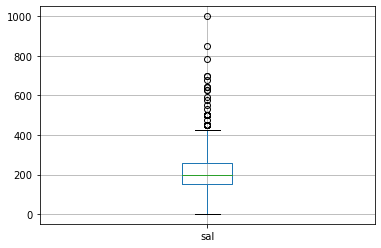

In [107]:
telegram.query('sal_rub == True').boxplot(column = 'sal')
plt.show()

In [108]:
telegram['sal'][telegram['sal_usd'] == True] = telegram['sal'][telegram['sal_usd'] == True].apply(lambda x: x/1000 if x > 50  else x)


/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/318678469.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['sal'][telegram['sal_usd'] == True] = telegram['sal'][telegram['sal_usd'] == True].apply(lambda x: x/1000 if x > 50  else x)


In [109]:
telegram['sal'][telegram['sal_usd'] == True].describe()

count    186.000000
mean       3.429573
std        2.510762
min        0.051500
25%        1.925000
50%        3.250000
75%        4.500000
max       15.000000
Name: sal, dtype: float64

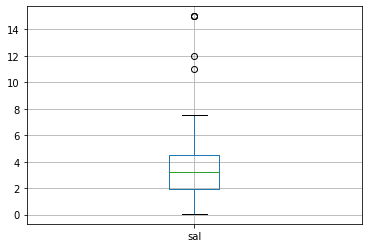

In [110]:
telegram.query('sal_usd == True').boxplot(column = 'sal')
plt.show()

In [111]:
# переведем в рубли (курс предположим 50)
telegram['sal'][telegram['sal_usd'] == True]= telegram['sal'][telegram['sal_usd'] == True]*50

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/910396375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['sal'][telegram['sal_usd'] == True]= telegram['sal'][telegram['sal_usd'] == True]*50


In [112]:
telegram['sal'][telegram['sal_eur'] == True] = telegram['sal'][telegram['sal_eur'] == True].apply(lambda x: x/1000 if x > 50  else x)



/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/3678514320.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['sal'][telegram['sal_eur'] == True] = telegram['sal'][telegram['sal_eur'] == True].apply(lambda x: x/1000 if x > 50  else x)


In [113]:
telegram['sal'][telegram['sal_eur'] == True].describe()

count    29.000000
mean      4.009195
std       0.987628
min       2.000000
25%       3.400000
50%       4.000000
75%       4.500000
max       6.700000
Name: sal, dtype: float64

In [114]:
# переведем в рубли (курс предположим 50)
telegram['sal'][telegram['sal_eur'] == True] = telegram['sal'][telegram['sal_eur'] == True]*50

/var/folders/_5/zq6mlq6x11l0v2hqm6dfg2q80000gn/T/ipykernel_18759/3990425964.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  telegram['sal'][telegram['sal_eur'] == True] = telegram['sal'][telegram['sal_eur'] == True]*50


In [115]:
telegram['sal'].describe()

count    1888.000000
mean      207.581655
std       103.848234
min         1.000000
25%       150.000000
50%       200.000000
75%       250.000000
max      1000.000000
Name: sal, dtype: float64

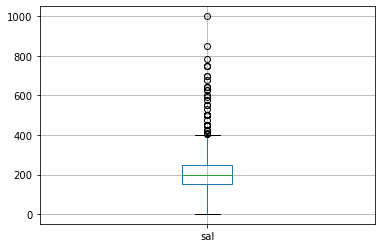

In [116]:
telegram.boxplot(column = 'sal')
plt.show()

#### Комментарий

зарплатные данные есть по чуть больше половины строк (2163)

## Итоговый датафрейм

### Создание итогового датафрейма

In [182]:
telegram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   chat         3512 non-null   object        
 1   message_id   3512 non-null   int64         
 2   date         3512 non-null   datetime64[ns]
 3   text         3512 non-null   object        
 4   entities     3512 non-null   object        
 5   chat_id      3512 non-null   int64         
 6   chat_title   3512 non-null   object        
 7   text_clear   3512 non-null   object        
 8   spec         3512 non-null   object        
 9   len          3512 non-null   int64         
 10  grade_list   1168 non-null   object        
 11  grade        3512 non-null   object        
 12  exp          3512 non-null   object        
 13  exp_grade    3512 non-null   object        
 14  format       3512 non-null   object        
 15  remote       3512 non-null   bool          
 16  office

In [183]:
telegram.columns

Index(['chat', 'message_id', 'date', 'text', 'entities', 'chat_id',
       'chat_title', 'text_clear', 'spec', 'len', 'grade_list', 'grade', 'exp',
       'exp_grade', 'format', 'remote', 'office', 'hybrid', 'day', 'schedule',
       'top', 'startup', 'skills', 'salary', 'sal_usd_eur', 'sal_rub',
       'sal_usd', 'sal_eur', 'sal', 'format_work', 'comp'],
      dtype='object')

In [184]:
columns = ['date', 'spec', 'grade', 'format_work', 'schedule', 'comp', 'skills',
       'sal']

In [185]:
data = pd.DataFrame(data = telegram, columns=columns)

In [187]:
data.head(5)

,date,spec,grade,format_work,schedule,comp,skills,sal
0,2022-09-21 11:17:48,da,junior,remote,full,top,sql,320.0
1,2022-09-21 08:49:51,da,middle,remote,n/d,other,js sql,200.0
2,2022-09-05 15:03:49,de,senior,remote,full,top,bi tableau airflow etl sql python,300.0
3,2022-08-22 16:26:21,ds,middle,office,n/d,other,python sql excel power query pivot,200.0
4,2022-08-22 16:25:59,da,middle,remote,n/d,other,js,200.0


In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3512 entries, 0 to 3511
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3512 non-null   datetime64[ns]
 1   spec         3512 non-null   object        
 2   grade        3512 non-null   object        
 3   format_work  3512 non-null   object        
 4   schedule     3512 non-null   object        
 5   comp         3512 non-null   object        
 6   skills       3512 non-null   object        
 7   sal          1888 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 219.6+ KB


In [189]:
data.to_csv('data.csv', )

## Анализ данных

#### специальности

In [124]:
# Количество вакансий по специальностям
data['spec'].value_counts()

da    1771
ds    1122
de     619
Name: spec, dtype: int64

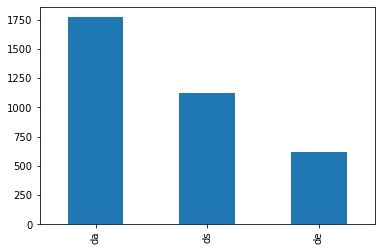

In [125]:
data['spec'].value_counts().plot(kind = 'bar')
plt.show()

#### компании

In [126]:
# Количество вакансий по специальностям среди топовых компаний
data['spec'][data['top'] == True].value_counts(normalize = True)

da    0.510181
ds    0.324661
de    0.165158
Name: spec, dtype: float64

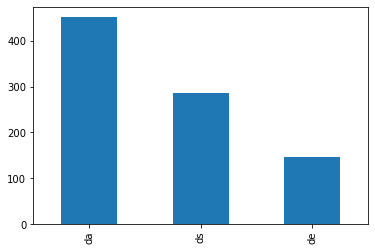

In [127]:
data['spec'][data['top'] == True].value_counts().plot(kind = 'bar')
plt.show()

In [128]:
# Количество вакансий по специальностям среди стартапов
data['spec'][data['startup'] == True].value_counts(normalize = True)

da    0.435644
ds    0.341584
de    0.222772
Name: spec, dtype: float64

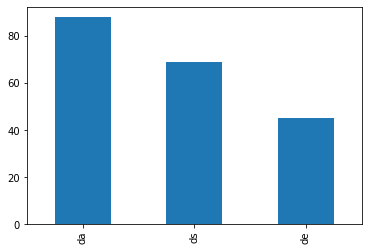

In [129]:
data['spec'][data['startup'] == True].value_counts().plot(kind = 'bar')
plt.show()

#### формат

In [130]:
# для каждой специальности выделим наиболее востребованный формат
pd.pivot_table(data, index = 'spec', values = ['remote', 'office', 'hybrid'], aggfunc = ('sum'))

,hybrid,office,remote
spec,,,
da,268,1441,626
de,94,423,338
ds,153,832,492


In [131]:
pd.pivot_table(data, index = 'spec', values = ['remote', 'office', 'hybrid'], aggfunc = ('sum')).sum(axis = 0)

hybrid     515
office    2696
remote    1456
dtype: int64

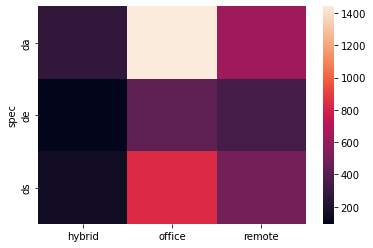

In [132]:
sns.heatmap(pd.pivot_table(data, index = 'spec', values = ['remote', 'office', 'hybrid'], aggfunc = 'sum'))
plt.show()

In [248]:
format_work = data.groupby(['spec', 'format_work'])['spec'].count()
format_work

spec  format_work
da    hybrid           48
      office         1097
      remote          626
de    hybrid            5
      office          276
      remote          338
ds    hybrid            7
      office          623
      remote          492
Name: spec, dtype: int64

In [249]:
format_work.to_csv('format_work.csv')

#### график

In [133]:
# для каждой специальности выделим данные по графикам
data['schedule'][data['spec'] == 'ds'].value_counts(normalize=True)

full    0.817291
n/d     0.176471
part    0.006239
Name: schedule, dtype: float64

In [134]:
data['schedule'][data['spec'] == 'da'].value_counts(normalize=True)

full    0.898363
n/d     0.089780
part    0.011858
Name: schedule, dtype: float64

In [135]:
data['schedule'][data['spec'] == 'de'].value_counts(normalize=True)

full    0.886914
n/d     0.098546
part    0.014540
Name: schedule, dtype: float64

In [245]:
schedule = data.groupby(['spec', 'schedule'])['spec'].count()

In [250]:
schedule

spec  schedule
da    full        1591
      n/d          159
      part          21
de    full         549
      n/d           61
      part           9
ds    full         917
      n/d          198
      part           7
Name: spec, dtype: int64

In [246]:
schedule.to_csv('schedule.csv')

#### степень

In [136]:
data['grade'].value_counts()

None      1953
middle     616
senior     479
junior     464
Name: grade, dtype: int64

In [137]:
data['grade'][data['spec'] == 'ds'].value_counts(normalize=True)

None      0.464349
senior    0.186275
middle    0.184492
junior    0.164884
Name: grade, dtype: float64

In [138]:
data['grade'][data['spec'] == 'de'].value_counts(normalize=True)

None      0.518578
middle    0.189015
senior    0.180937
junior    0.111470
Name: grade, dtype: float64

In [139]:
data['grade'][data['spec'] == 'da'].value_counts(normalize=True)

None      0.627329
middle    0.164879
junior    0.118577
senior    0.089215
Name: grade, dtype: float64

In [241]:
grade = data.groupby(['grade', 'spec'])['spec'].count()

In [242]:
grade.to_csv('grade.csv')

#### зарплата

In [140]:
data.pivot_table(index = 'spec', values = 'sal', aggfunc = 'mean')

,sal
spec,
da,197.614279
de,215.062276
ds,215.149455


<AxesSubplot:xlabel='spec'>

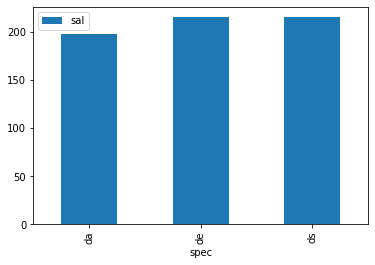

In [141]:
data.pivot_table(index = 'spec', values = 'sal', aggfunc = 'mean').plot(kind = 'bar')

In [142]:
data.pivot_table(index = 'spec', columns = ['top', 'startup'], values = 'sal', aggfunc = 'mean')

top           False                    True
startup       False        True       False
spec                                       
da       191.000852  198.338406  215.111802
de       219.626472  195.840000  209.281173
ds       218.032919  184.140370  215.031696

<AxesSubplot:xlabel='spec'>

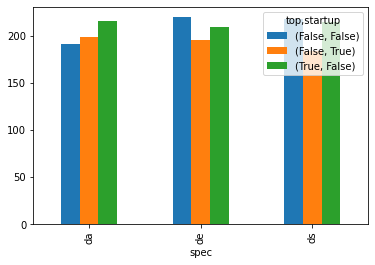

In [143]:
data.pivot_table(index = 'spec', columns = ['top', 'startup'], values = 'sal', aggfunc = 'mean').plot(kind = 'bar')

In [219]:
avg_sal = pd.DataFrame(data = data['sal'].groupby(data['date'].dt.to_period('M')).mean())


In [224]:
avg_sal_ds = pd.DataFrame(data = data['sal'][data['spec'] == 'ds'].groupby(data['date'].dt.to_period('M')).mean())
avg_sal_da = pd.DataFrame(data = data['sal'][data['spec'] == 'da'].groupby(data['date'].dt.to_period('M')).mean())
avg_sal_de = pd.DataFrame(data = data['sal'][data['spec'] == 'de'].groupby(data['date'].dt.to_period('M')).mean())


In [229]:
avg_sal_ds.to_csv('avg_sal_ds.csv')
avg_sal_da.to_csv('avg_sal_da.csv')
avg_sal_de.to_csv('avg_sal_de.csv')

#### навыки

In [144]:
skills_table = pd.DataFrame(data=matrix_count, columns = vectorizer.get_feature_names_out())

In [145]:
table = pd.DataFrame(data = matrix_count, columns = vectorizer.get_feature_names_out())

In [146]:
table.head(5)

,airflow,bi,bigquery,css,docker,etl,excel,git,grafana,html,...,python,pytorch,query,scikit,seaborn,skipy,sql,tableau,tensorflow,xgboost
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,1,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [147]:
index_ds = data[data['spec'] == 'ds'].index
index_da = data[data['spec'] == 'da'].index
index_de = data[data['spec'] == 'de'].index

In [148]:
skills_ds = table.iloc[index_ds].sum(axis = 0)
skills_da = table.iloc[index_da].sum(axis = 0)
skills_de = table.iloc[index_de].sum(axis = 0)

In [149]:
skills_ds_table = pd.DataFrame(data = skills_ds, columns = ['frequency'])
skills_ds_table.sort_values(by = 'frequency', ascending = False).head(5)

,frequency
python,741
sql,470
git,256
pandas,242
numpy,194


In [179]:
skills_ds_table.to_csv('skills_ds_table.csv', )

In [150]:
skills_da_table = pd.DataFrame(data = skills_da, columns = ['frequency'])
skills_da_table.sort_values(by = 'frequency', ascending = False).head(5)

,frequency
sql,870
python,673
bi,444
etl,290
tableau,241


In [180]:
skills_da_table.to_csv('skills_da_table.csv', )

In [151]:
skills_de_table = pd.DataFrame(data = skills_de, columns = ['frequency'])
skills_de_table.sort_values(by = 'frequency', ascending = False).head(5)

,frequency
python,374
sql,347
airflow,205
etl,194
git,122


In [181]:
skills_de_table.to_csv('skills_de_table.csv', )

### Выводы

 - Наибольшее число вакансий приходится на дата аналитика, далее - дата саентист, после дата инженер.
 - Аналитика чаще ищут в топовых компаниях, саентистов и инженеров - в стартапах
 - Соотношение вакансий с работой в офисе, удаленно и в гибридном формате составляет примерно 60-30-10. Чаще в офисе предлагают работать аналитикам, реже - саентистам, и меньше половины - инженерам.
 - Кроме того, полный рабочий день важен для аналитиков и инженеров.
 - Чаще ищут специалистов средного грейда (мидл), а младших и старших - примерно одинаково. У аналитиков менее востребованы сеньоры, у саентистов и инженеров - джуны, а мидл и сеньор одинаково.
 - Средняя зарплата для саентистов и инженеров примерно равны 215 000 руб, а у аналитиков меньше 200 000 руб. У топовых компаний зарплата аналитиков выше средней, но у инженеров ниже, зарплата учёных примерно равны обычным компаниям. У стартапов зарплата для всех специальностей ниже примерно на 15 000 – 30 000 руб.
 - Наиболее важным навыкам для саентистов является знание python, sql, git для инженера – sql, python, airflow, а для аналитиков – bi, sql, python.

## Гипотезы

 - Чем выше Грейд, тем выше зарплата. Проверим влияют ли на уровень зарплаты опыт и навыки. 
Средняя зарплата варьируется в зависимости от специальности. Как изменяется зарплата между разными специальностями.

**Гипотеза 1 - подтверждена**


In [152]:
data.pivot_table(index = 'grade', values = 'sal', aggfunc = 'mean')

,sal
grade,
None,212.460504
junior,169.049420
middle,203.510276
senior,238.009923


 - В зависимости от размера компании меняется запрос по специальности*. Какие компании более заинтересованы в аналитиках, какие - в инженерах, а какие - в дата саинтистах. 
 
**Гипотеза 2 - не подтверждена** и стартапы, и топовые компании чаще ищут аналитиков, далее дата саентистов, а реже инженеров.


In [153]:
data.query('top == True').groupby('spec')['spec'].count()

spec
da    451
de    146
ds    287
Name: spec, dtype: int64

In [154]:
data.query('startup == True').groupby('spec')['spec'].count()

spec
da    88
de    45
ds    69
Name: spec, dtype: int64

 - Количество вакансий в текущем году ниже, чем в предыдущем по всем специальностям. В связи с экономическими и геополитическими изменениями количество вакансий снизилось.
 
**Гипотеза 3 - не подтверждена** количество вакансий растет, за неполный 2022 год вакансий аналитиков и инженеров больше. данных 2019 и 2020 годов не достаточно для оченки динамики

In [155]:
data['year'] = pd.DatetimeIndex(data['date']).year

In [156]:
data['year'].value_counts()

2022    1592
2021    1518
2020     334
2019      68
Name: year, dtype: int64

In [157]:
data.pivot_table(index = ['spec'], values = 'date', columns = 'year', aggfunc = 'count')

year,2019,2020,2021,2022
spec,,,,
da,5,173,725,868
de,5,39,269,306
ds,58,122,524,418


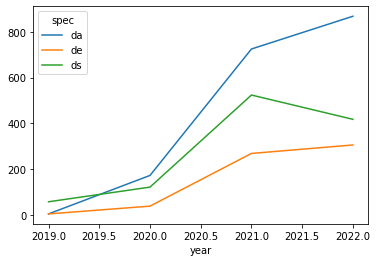

In [158]:
data.pivot_table(index = ['year'], values = 'date', columns = 'spec', aggfunc = 'count').plot()
plt.show()